#General Information

Welcome to the final Assignment. We will be applying the concepts we have learned over this week to solve this week's assignments. So, Let's get started! Goodluck!

Please fill out your name and email in the below cell



In [1]:
#NAME :Prateek Upadhya
#EMAIL :f20200056@goa.bits-pilani.ac.in

Hello folks!
We congratulate you for reaching the final assignments. We wish you luck for the same. In this notebook you're supposed to predict the asteroid size using various algorithms and find out the R2 Score. Fine tune the model to get best possible R2 Score.

# About the dataset

The open asteroid dataset consists of records about the asteroids with their respective physical and basic products. We shall first clean the data and then apply various data modeling techniques to generate an accurate model which is capable of predicting the size of an asteroid in terms of its diameter. 

# Imports

In [2]:
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#import scipy
#from scipy import stats

# Load The Asteroid data set and understand data stats

In [3]:
astro_df = pd.read_csv("Asteroid_Updated.csv", low_memory = False)

In [4]:
astro_df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [5]:
astro_df.shape

(839714, 31)

In [6]:
astro_df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

### Rename columns for better understanding

While processing data it is important for us to understand each and every feature well. This will help us in feature selection and in determining feature relevance and data types.

In [7]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}

astro_df = astro_df.rename(columns = new_columns_dict)
astro_df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [8]:
#Displays count of missing values and respective percentage for every feature

missing= pd.concat([pd.isnull(astro_df).sum(), 100 * pd.isnull(astro_df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


# Dealing with Null values

- The diameter is the target variable which we are trying to predict. As a result - we cannot tolerate any null values for this variable. The null count-percentage tabel shows that 83 percent of all the data points have a null diameter entry. Since the proportion high, we cannot fill the null values with mean/median or any other statistical tendencies. This would result in high bias error. Hence we will drop all the null values in diameter. 

- Given that we have a large enough dataset, dropping 83% of the values still leaves behind 137636 data points - which are sufficient to train the data.

In [9]:
#drops all null rows in diameter
astro_df = astro_df.dropna(axis = 0, subset = ['diameter'])
astro_df.shape

(137636, 31)

In [10]:
#Identify missing values 
missing= pd.concat([pd.isnull(astro_df).sum(), 100 * pd.isnull(astro_df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


***
* **We will be dropping all the columns which have a null percentage that is greater than 80 per cent.**
* **For those columns with null percentage less than one percentage - will will perform further analysis and determine whether to drop or interpolate.**

***

In [11]:
# List of columns that we will be dropping
drop_column_list = ['obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']

astro_df.drop(drop_column_list, axis = 1, inplace = True)
len(astro_df.columns)

21

Notice that the number of featues has reduced from 31 to 21

In [12]:
#Identify missing values 
missing= pd.concat([pd.isnull(astro_df).sum(), 100 * pd.isnull(astro_df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
semi-major_axis(au),0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
diameter,0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
orbital_period(d),0,0.000000
condition_code,0,0.000000
n_obs_used,0,0.000000


## Analyse and deal with remaining null values

-  We will visualize the nature of the data wrt each of the low null-percentage varaiables and come up with suitable ways to deal with all the null values.

In [13]:
astro_df['abs_mag_para'].describe()

count    136889.000000
mean         15.177041
std           1.407654
min           3.200000
25%          14.400000
50%          15.300000
75%          16.100000
max          29.900000
Name: abs_mag_para, dtype: float64

The mean and meadian appear to have similar values, implying low skewness. Lets visualize this to get a better idea

### Absolute magnitude parameter

<AxesSubplot:xlabel='abs_mag_para'>

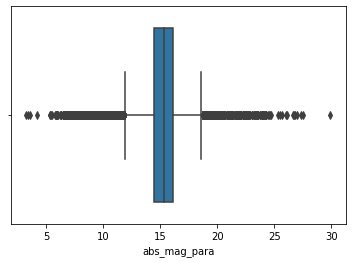

In [14]:
# box plot
sns.boxplot(x = 'abs_mag_para',data = astro_df)

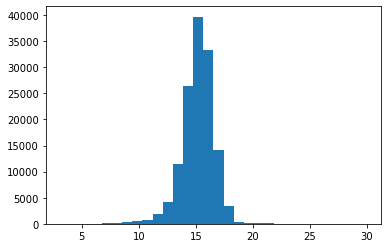

In [15]:
# Histogram
plt.hist(astro_df['abs_mag_para'],bins=int(300/10))
plt.show()

In [16]:
#Owing to the fact that the data shows very little skewness, I will be filling up all the null values with the mean
astro_df.loc[astro_df['abs_mag_para'].isnull(),'abs_mag_para'] = astro_df['abs_mag_para'].mean()

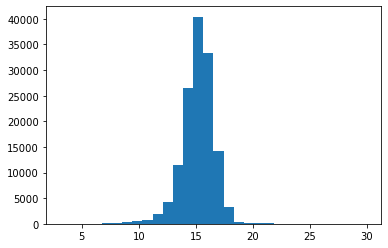

In [17]:
plt.hist(astro_df['abs_mag_para'],bins=int(300/10))
plt.show()

***
- We notice that filling up the null values with the mean of the data had negligible affect on the distribution, implying that the decision to fill null values with mean is valid.

- We will repeat the same procedure for the remaining features.
***

### Data Arc

In [18]:
astro_df['data_arc(d)'].describe()

count    137498.000000
mean       8969.818601
std        6165.176190
min           1.000000
25%        6291.000000
50%        7572.000000
75%        9731.000000
max       72684.000000
Name: data_arc(d), dtype: float64

<AxesSubplot:xlabel='data_arc(d)'>

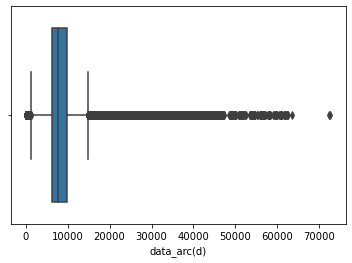

In [19]:
# box plot
sns.boxplot(x = 'data_arc(d)',data = astro_df)

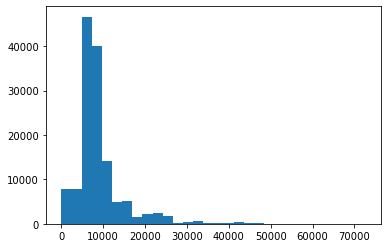

In [20]:
plt.hist(astro_df['data_arc(d)'],bins=int(300/10))
plt.show()

<AxesSubplot:xlabel='data_arc(d)', ylabel='Density'>

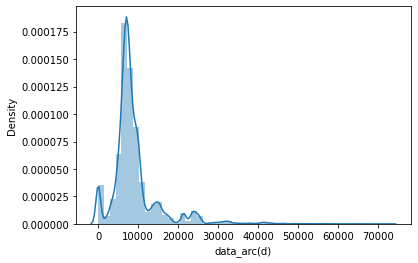

In [21]:
# Distribution after imputing null values
sns.distplot(astro_df['data_arc(d)'])

- It is evident that the data is positively skewed. As a result, the median is preferred to fill the null values over the mean.

In [22]:
astro_df.loc[astro_df['data_arc(d)'].isnull(),'data_arc(d)'] = astro_df['data_arc(d)'].median()

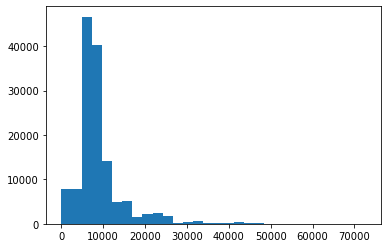

In [23]:
plt.hist(astro_df['data_arc(d)'],bins=int(300/10))
plt.show()

- The distribution has stayed approximtely the same. The substitution of null vlaues with median is valid 

### Albedo

In [24]:
astro_df['geo_albedo'].describe()

count    136406.000000
mean          0.130066
std           0.109994
min           0.001000
25%           0.053000
50%           0.078000
75%           0.188000
max           1.000000
Name: geo_albedo, dtype: float64

<AxesSubplot:xlabel='geo_albedo'>

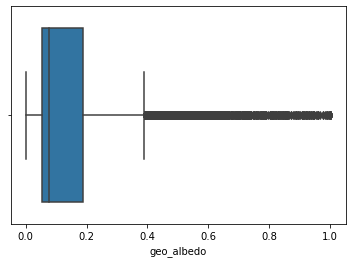

In [25]:
# box plot
sns.boxplot(x = "geo_albedo", data = astro_df)

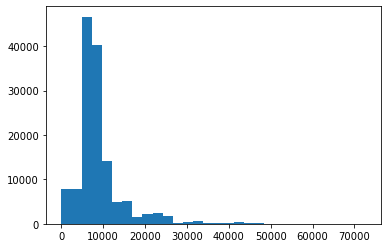

In [26]:
plt.hist(astro_df['data_arc(d)'],bins=int(300/10))
plt.show()

- The albedo data is also positively skewed; hence we will once again employ median subtitution

In [27]:
astro_df.loc[astro_df['geo_albedo'].isnull(),'geo_albedo'] = astro_df['geo_albedo'].median()

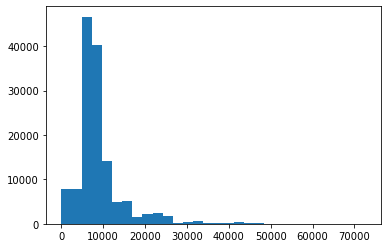

In [28]:
plt.hist(astro_df['data_arc(d)'],bins=int(300/10))
plt.show()

In [29]:
#As you can see all the null values have been dealt with
astro_df.isnull().sum()

semi-major_axis(au)                0
eccentricity                       0
x-y_inclination(deg)               0
longitude_asc_node                 0
argument_perihelion                0
perihelion_dist(au)                0
aphelion_dist(au)                  0
orbital_period                     0
data_arc(d)                        0
condition_code                     0
n_obs_used                         0
abs_mag_para                       0
near_earth_obj                     0
physically_hazardous_asteroid      0
diameter                           0
geo_albedo                         0
earth_min_oribit_inter_dist(au)    0
class                              0
mean_motion(deg/d)                 0
orbital_period(d)                  0
mean_anomaly(deg)                  0
dtype: int64

# Data types

In [30]:
astro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137636 non-null  float64
 1   eccentricity                     137636 non-null  float64
 2   x-y_inclination(deg)             137636 non-null  float64
 3   longitude_asc_node               137636 non-null  float64
 4   argument_perihelion              137636 non-null  float64
 5   perihelion_dist(au)              137636 non-null  float64
 6   aphelion_dist(au)                137636 non-null  float64
 7   orbital_period                   137636 non-null  float64
 8   data_arc(d)                      137636 non-null  float64
 9   condition_code                   137636 non-null  object 
 10  n_obs_used                       137636 non-null  int64  
 11  abs_mag_para                     137636 non-null  float64
 12  ne

***
- Now that we have dealt with all the null values in the data set, we now look into the data types. This requires knowledge about the features, which is why it is always a good practice to read up about the features before working on a model. This knowledge will help us decide if a feature is assigned to the correct data type or not.
***

### Object data

In [31]:
astro_df.select_dtypes('object').tail()

,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
797860,1,N,N,3.793,MBA
798077,2,N,N,2.696,MBA
798189,1,N,N,2.917,MBA
799752,2,N,N,3.271,MBA
810375,3,N,N,1.600,MBA


In [32]:
astro_df.describe(include = np.object)

C:\Users\prate\AppData\Local\Temp/ipykernel_27700/3376340912.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  astro_df.describe(include = np.object)


,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
count,137636,137636,137636,137636,137636
unique,10,2,2,16714,11
top,0,N,N,4.017,MBA
freq,128213,136786,137415,45,126390


***
- We notice that due to some inconsistency in the dataset; diameter has been categorized as an object, we need to convert it to a numeric value before we proceed
***

In [33]:
astro_df['diameter'] = pd.to_numeric(astro_df['diameter'])

ValueError: Unable to parse string "226 " at position 15

In [34]:
astro_df.at[15,'diameter'] = 266  #changing the string value at index 15

In [35]:
astro_df['diameter'] = pd.to_numeric(astro_df['diameter'])

In [36]:
astro_df["condition_code"].unique()

array(['0', '1', '3', '2', '4', '5', '9', '7', '6', '8'], dtype=object)

-The condition code is inconsistent. It appears that it should have 10 values of the same type, but there are integers, floats, and strings. Converting it to integer type, creates consistency.

In [37]:
astro_df['condition_code'] = astro_df['condition_code'].astype('int64')
astro_df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8], dtype=int64)

In [38]:
astro_df['near_earth_obj'].unique()

array(['N', 'Y'], dtype=object)

In [39]:
astro_df['physically_hazardous_asteroid'].unique()

array(['N', 'Y'], dtype=object)

In [40]:
astro_df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

### Integer data

In [41]:
astro_df.select_dtypes('int64')

,condition_code,n_obs_used
0,0,1002
1,0,8490
2,0,7104
3,0,9325
4,0,2916
...,...,...
797860,1,50
798077,2,33
798189,1,47
799752,2,27


### Float data

In [42]:
astro_df.select_dtypes('float64')

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),abs_mag_para,diameter,geo_albedo,earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,16.20,3.793,0.0210,1.66301,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,17.30,2.696,0.0610,1.36733,0.242270,1485.943371,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,16.80,2.917,0.0780,1.43837,0.176610,2038.391053,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,17.20,3.271,0.0720,1.16684,0.184914,1946.853973,175.708508


# Outlier Analysis

1. Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.
2. They usually occur due to human error, error in measurement, experimenatl errors etc.
3. Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
4. It increases the error variance and reduces the power of statistical tests.
5. If the outliers are non-randomly distributed, they can decrease normality.
6. Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.

- The following reasons higlight the importance of identifying and removing outliers


In [43]:
# Get all the Numerical columns list
numerical_cols=list(astro_df.select_dtypes(include=np.number).columns)


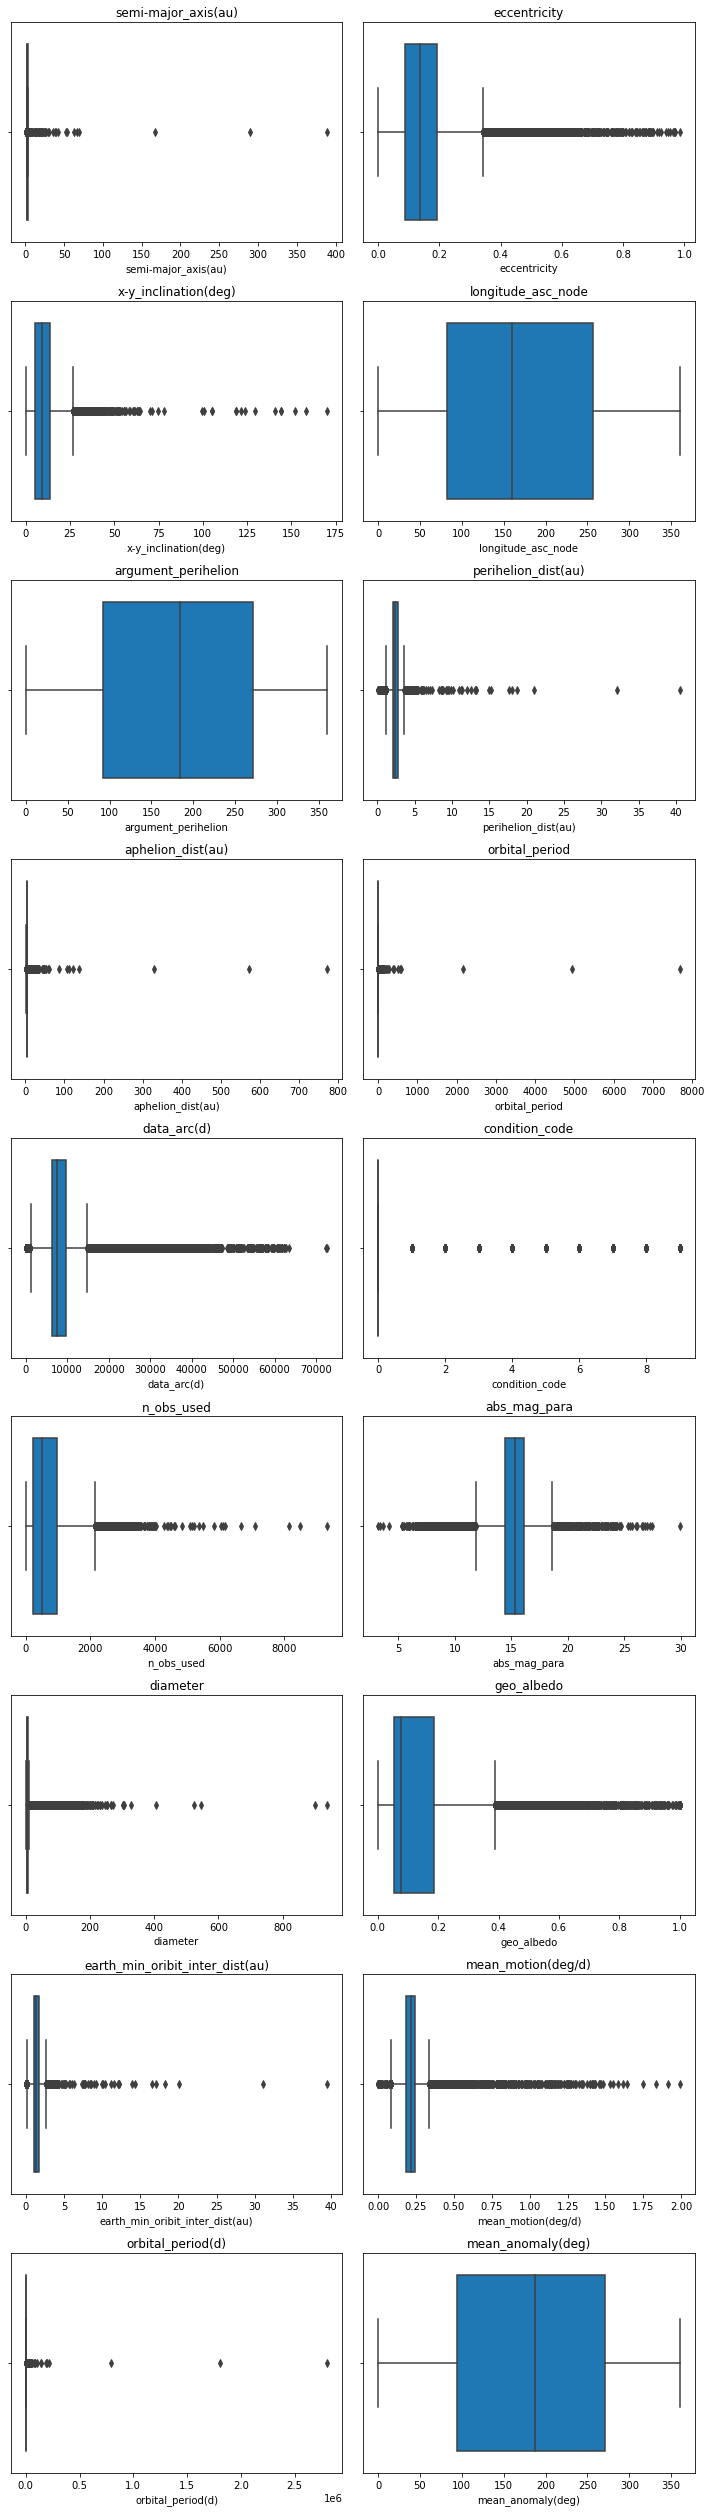

In [44]:
rows=len(numerical_cols)//2
cols=2

fig, ax  = plt.subplots(rows,cols,figsize=(10,35))

i=0

for row in range(rows):
    for col in range(cols):
        if i < len(numerical_cols):
#            ax[row,col].boxplot(x=numerical_cols[i],data=housing_prices,vert=False)        
            sns.boxplot(x=numerical_cols[i],data= astro_df,saturation=1,ax=ax[row,col])
            ax[row,col].set_title(numerical_cols[i])  
            i=i+1

plt.tight_layout()

- We notice that there are a lot of features that have outliers which need to be treated. This is essential in obtaining a good model

In [45]:
# Values for Numerical columns @ Quantile1  
Q1 = astro_df[numerical_cols].quantile(0.25)

# Values for Numerical columns @ Quantile3  
Q3 = astro_df[numerical_cols].quantile(0.75)

# InterQuantileRange Values for Numerical columns 
IQR = Q3 - Q1

# Lower Outlier Cutoff
LC = Q1 - 1.5 * IQR

# Upper Outlier Cutoff
UC = Q3 + 1.5 * IQR

In [46]:
print('No. of rows left after removing the Statistical outliers')
astro_df[~((astro_df[numerical_cols] < (LC)) |(astro_df[numerical_cols] > (UC))).any(axis=1)].shape[0]

No. of rows left after removing the Statistical outliers


100988

***
- Since the number of samples that remain after removing the outliers is significant enough to train the data set - I have removed all the outliers
***

In [47]:
astro_df = astro_df[~((astro_df[numerical_cols] < (LC)) |(astro_df[numerical_cols] > (UC))).any(axis=1)]

In [48]:
astro_df.shape

(100988, 21)

# Exploring the Data

In [49]:
data_type = astro_df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

1. Near Earth Object (NEO) : An asteroid or comet that is less than 1.3 au from the sun.
2. Physically Hazardous: Determined by whether it is an NEO and its size.
    
- Since the physically hazardous classifer is based on the target, it cannot be used for modeling.
- The NEO classifer is represented within the more specific classifer of orbit class, so the NEO classifer is not needed for further exploration.

In [50]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
astro_df.drop(drop_list, axis=1, inplace=True)

In [51]:
astro_df.drop('condition_code', axis=1, inplace=True)

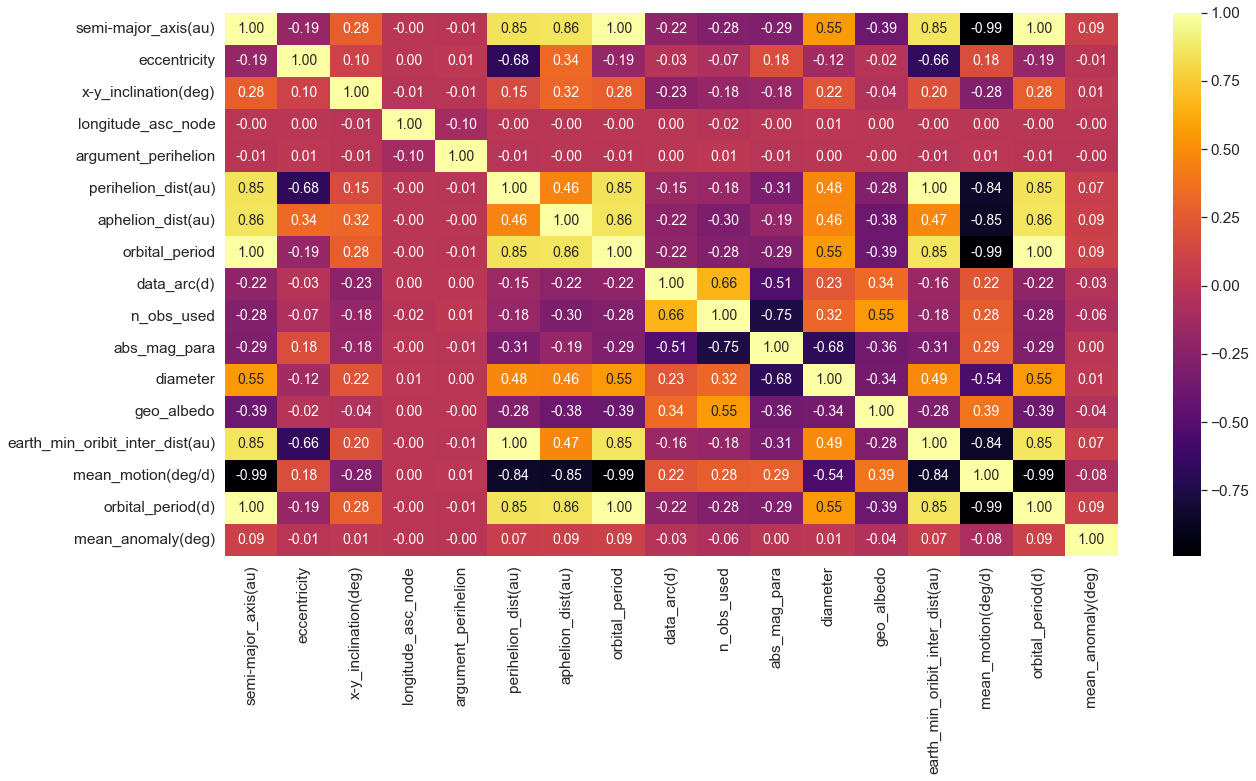

In [52]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(astro_df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});

In [53]:
astro_df.select_dtypes(object)

,class
2859,MBA
3040,MBA
3074,MBA
3159,MBA
3285,MBA
...,...
797088,MBA
797156,MBA
797203,MBA
797237,MBA


In [54]:
astro_df['class'].unique()

array(['MBA', 'MCA', 'OMB'], dtype=object)

In [55]:
astro_df = pd.get_dummies(astro_df, columns=['class'])  #This is equivalent to encoding the categorical data

# Feature selection

I have performed feature selection on the basis of correlation

In [56]:
corr = astro_df.corr()

In [57]:
corr.shape

(20, 20)

In [58]:
astro_df.shape

(100988, 20)

In [59]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = astro_df.columns[columns]
astro_df = astro_df[selected_columns]

***
- The above block of code removes on of the pair of features that have a correlation that is greater than 0.9
***

In [60]:
astro_df.shape

(100988, 17)

In [61]:
#Split data into features and target.
y = astro_df['diameter']
X = astro_df.drop(columns = 'diameter')

In [62]:
#Standarize the features

#Apply a standard scaler to the data.
SS_scaler = StandardScaler()

# Fit the standard scaler to the data.
x_std = SS_scaler.fit_transform(X)

In [63]:
#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    x_std, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score         #to get the accuracy of each model

In [65]:
from sklearn.linear_model import LinearRegression
model_linr = LinearRegression()
model_linr.fit(X_train, y_train)
model_linr.predict(X_test)

diameterPrediction  = model_linr.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_linr = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2_linr)          

root mean square error : 0.6845637752928833
R2 Score :  0.861085220501361


In [66]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
model_ridge.predict(X_test)

diameterPrediction  = model_ridge.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_ridge = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2_ridge) 

root mean square error : 0.6845651190604235
R2 Score :  0.861084675134044


In [67]:
from sklearn import linear_model
model_lin = linear_model.Lasso(alpha=0.1)
model_lin.fit(X_train, y_train)
model_lin.predict(X_test)

diameterPrediction  = model_lin.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_lin = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2_lin) 

root mean square error : 0.7274244539188887
R2 Score :  0.8431457035372962


In [68]:
from sklearn.neighbors import KNeighborsRegressor
model_kn = KNeighborsRegressor()
model_kn.fit(X_train, y_train)
model_kn.predict(X_test)

diameterPrediction  = model_kn.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_kn = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2_kn)

root mean square error : 0.6475703059855182
R2 Score :  0.8756933169380248


In [69]:
from sklearn.tree import DecisionTreeRegressor
model_dtree = DecisionTreeRegressor()
model_dtree.fit(X_train, y_train)
model_dtree.predict(X_test)

Cost_prediction  = model_dtree.predict(X_test)
mse = mean_squared_error(y_test, Cost_prediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2_dtree = r2_score(y_test,Cost_prediction)
print("R2 Score : ",r2_dtree)   

root mean square error : 0.5888030982205396
R2 Score :  0.8972313151431479


In [70]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf.predict(X_test)

Cost_prediction = model_rf.predict(X_test)
mse = mean_squared_error(y_test, Cost_prediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_rf = r2_score(y_test,Cost_prediction)
print("R2 Score : ",r2_rf)

root mean square error : 0.4177353366723337
R2 Score :  0.948272313613627


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

model_gdb = GradientBoostingRegressor()
model_gdb.fit(X_train, y_train)
model_gdb.predict(X_test)

Cost_prediction  = model_gdb.predict(X_test)
mse = mean_squared_error(y_test, Cost_prediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_gdb = r2_score(y_test,Cost_prediction)
print("R2 Score : ",r2_gdb)

root mean square error : 0.4330290733674233
R2 Score :  0.9444153677028286


In [72]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)
model_xg.predict(X_test)

Cost_prediction = model_xg.predict(X_test)
mse = mean_squared_error(y_test, Cost_prediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2_xg = r2_score(y_test,Cost_prediction)
print("R2 Score : ",r2_xg)  

root mean square error : 0.4128020539578711
R2 Score :  0.9494868647910978


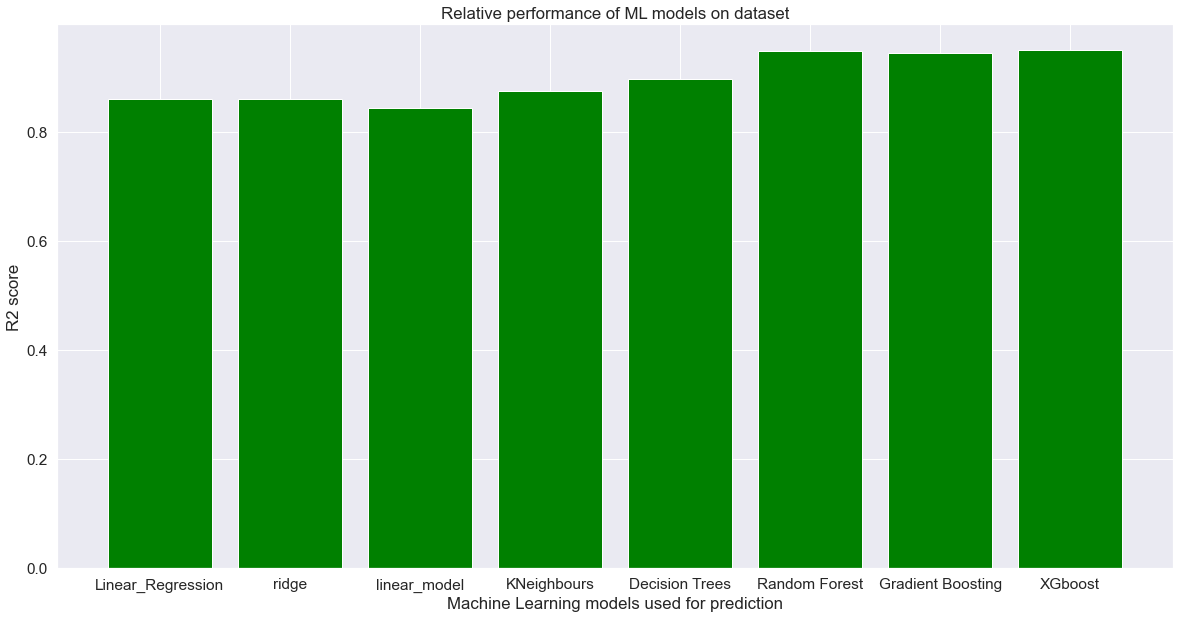

In [75]:
ml_models = ["Linear_Regression","ridge","linear_model","KNeighbours","Decision Trees","Random Forest", "Gradient Boosting", "XGboost"]
performance = [r2_linr,r2_ridge,r2_lin,r2_kn,r2_dtree,r2_rf,r2_gdb,r2_xg]
plt.bar(ml_models, performance, color = "green")

plt.rcParams["figure.figsize"] = (25,10)
plt.xlabel("Machine Learning models used for prediction")
plt.ylabel("R2 score")
plt.title("Relative performance of ML models on dataset")
plt.show()

### XGBoost is the clear winner with an r2 score of : 0.95  and hence can be used to predict the size of asteroids